<a href="https://colab.research.google.com/github/SajidMajeed92/HISB-PROJECTS/blob/main/Rice_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <p style="background-color:green;font-family:newtimeroman;color:black;font-size:150%;text-align:center;border-radius:10px 10px;">Rice Classification by using CNN</p>


In this study, Arborio, Basmati, Ipsala, Jasmine and Karacadag, which are five different varieties of rice often grown in Turkey, were used. A total of 75,000 grain images, 15,000 from each of these varieties, are included in the dataset. Models were created by using the Convolutional Neural Network (CNN) algorithm for the image dataset, and classification processes were performed. Statistical results of sensitivity, specificity, prediction, F1 score, accuracy, false positive rate and false negative rate were calculated using the confusion matrix values of the models and the results of each model were given in tables. Classification successes from the models were achieved as 99% for CNN.


   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:green;font-family:newtimeroman;color:black;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
* [1. Importing Libraries](#1)
    
* [2. Preparing Data](#2)
    
* [3. Build Model](#3)
    
* [4. Evaluation](#4)   
    
* [5. END](#5)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

In [ ]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

In [ ]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset --unzip --force

In [3]:
%cd /content/drive/My Drive/Kaggle

/content/drive/My Drive/Kaggle


In [6]:
!ls

Grapevine_Leaves_Image_Dataset	Rice_Image_Dataset  seg_test
kaggle.json			seg_pred	    seg_train


# <p style="background-color:green;font-family:newtimeroman;color:black;font-size:150%;text-align:center;border-radius:10px 10px;">Importing Libraries</p>

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import pathlib
import os

# <p style="background-color:green;font-family:newtimeroman;color:black;font-size:150%;text-align:center;border-radius:10px 10px;">Preparing Data</p>

In [8]:
tf.random.set_seed(42)

train_data = keras.utils.image_dataset_from_directory('/content/drive/My Drive/Kaggle/Rice_Image_Dataset/',
                                                 validation_split = 0.2,
                                                        subset = 'training',
                                                        seed = 1,
                                                        shuffle = True,
                                                        batch_size = 32,
                                                       image_size=(256,256))
test_data = keras.utils.image_dataset_from_directory('/content/drive/My Drive/Kaggle/Rice_Image_Dataset/',
                                                       validation_split = 0.2,
                                                       subset = 'validation',
                                                       seed = 1,
                                                       shuffle = True,
                                                       batch_size = 32,
                                                    image_size=(256,256))

Found 75000 files belonging to 5 classes.
Using 60000 files for training.
Found 75000 files belonging to 5 classes.
Using 15000 files for validation.


In [10]:
filenames = pathlib.Path('/content/drive/My Drive/Kaggle/Rice_Image_Dataset/')
for label in train_data.class_names :
    images = list(filenames.glob(f'{label}/*'))
    print(f'{label} : {len(images)}')

Arborio : 15000
Basmati : 15000
Ipsala : 15000
Jasmine : 15000
Karacadag : 15000


In [9]:
train_data.cardinality().numpy(),  test_data.cardinality().numpy() # The equation is: 60000/40 = cardinality, so it depends on your batch size.

(1875, 469)

In [11]:
train_set = train_data.take(1500)
val_set = train_data.skip(1500)   #train dataset now has first 1200 elements and the rest goes for val_set

In [12]:
train_set.cardinality().numpy(), val_set.cardinality().numpy()

(1500, 375)

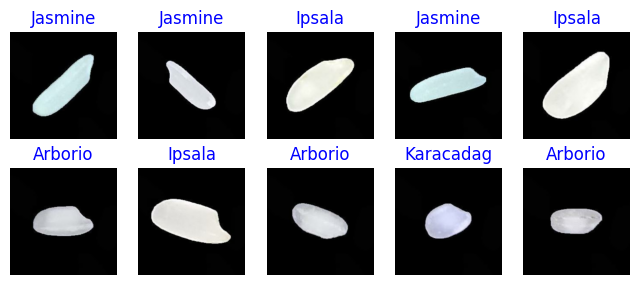

In [15]:
BATCH_SIZE = 10
plt.figure(figsize=(8, 5))
for images, labels in train_set.take(1):
   for i in range(BATCH_SIZE):
    indx = random.randint(0, len(images))
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(train_data.class_names[labels[i]], color= 'blue', fontsize= 12)
    plt.axis(False)
plt.show()

# <p style="background-color:green;font-family:newtimeroman;color:black;font-size:150%;text-align:center;border-radius:10px 10px;">Build Model</p>

> ##  Model with 5 epochs


In [16]:
for images_batch, labels_batch in train_set:
    print(images_batch.shape)
    print(labels_batch.shape)
    break

(32, 256, 256, 3)
(32,)


In [17]:
from tensorflow.keras import layers

In [ ]:
tf.random.set_seed(42)

cnn_1 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Flatten(),
    layers.Dense(500, activation = 'relu'),
    layers.Dense(5, activation = 'sigmoid')
])

cnn_1.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_1 = cnn_1.fit(train_set, epochs = 5, validation_data = val_set)

Epoch 1/5
  90/1500 [>.............................] - ETA: 2:17:33 - loss: 1.8905 - accuracy: 0.8222

In [ ]:
cnn_1.summary()

# <p style="background-color:green;font-family:newtimeroman;color:black;font-size:150%;text-align:center;border-radius:10px 10px;">Evaluation</p>

In [ ]:
def plot_training_curves(history_df):
    plt.figure(figsize = (13, 4), dpi = 120)
    ax = plt.subplot(1, 2, 1)
    plt.plot(range(1, len(history_df) + 1), history_df['loss'], marker = '.', label = 'Training Loss')
    plt.plot(range(1, len(history_df) + 1), history_df['val_loss'], marker = '^', label = 'Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy')
    plt.grid()
    plt.legend()
    ax = plt.subplot(1, 2, 2)
    plt.plot(range(1, len(history_df) + 1), history_df['accuracy'], marker = '.', label = 'Training Accuracy')
    plt.plot(range(1, len(history_df) + 1), history_df['val_accuracy'], marker = '^', label = 'Validation Accurcay')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
    plt.show()

In [ ]:
plot_training_curves(pd.DataFrame(history_1.history))

In [ ]:
X_test, y_test = None, None
for images, labels in test_data.take(100):
    if X_test == None or y_test == None:
        X_test = images
        y_test = labels
    else:
        X_test = tf.concat([X_test, images], axis = 0)
        y_test = tf.concat([y_test, labels], axis = 0)

X_test.shape, y_test.shape

In [ ]:
from sklearn import metrics
y_pred_proba = cnn_1.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis = 1)

In [ ]:
metrics.accuracy_score(y_test, y_pred)

In [ ]:
train_score = cnn_1.evaluate(train_data, verbose= 1)
test_score = cnn_1.evaluate(test_data, verbose= 1)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('*****************************')
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
print(classification_report(y_test , y_pred, target_names=target_names))

In [ ]:
import seaborn as sns
plt.figure(figsize = (6,6), dpi = 100)
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot = True, cmap = 'Greens')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.title('Conusion Matrix')
plt.show()

In [ ]:
# plot random images from a given dataset, and compare predictions with ground truth
def plot_random_predictions(dataset, model):

    shuffled_data = dataset.shuffle(10)
    class_names = dataset.class_names

    for images, labels in shuffled_data.take(1):
        plt.figure(figsize = (8, 8), dpi = 120)
        y_pred_proba = model.predict(images)

    for i in range(9):
        index = random.randint(0, len(images))
        ax = plt.subplot(3,3, i + 1)

        img = images[index].numpy().astype("uint8")
        y_true = class_names[labels[index]]
        y_pred = class_names[np.argmax(y_pred_proba[index], axis = 0)]

        c = 'g' if y_pred == y_true else 'r'

        plt.imshow(img)
        plt.title(f'Predicted : {y_pred}\nTrue label : {y_true}', c = c)
        plt.axis(False)

In [ ]:
plot_random_predictions(test_data, cnn_1)

# <p style="background-color:green;font-family:newtimeroman;color:black;font-size:150%;text-align:center;border-radius:10px 10px;">End</p>